In [1]:
import pandas as pds
import matplotlib.pyplot as plt
import numpy as np


In [4]:
data = pds.read_csv("advertising.csv")
data_numpy = data.to_numpy()
X=data.drop(["Clicked on Ad"], axis=1)
y=data["Clicked on Ad"]
timespentonsite = data["Daily Time Spent on Site"].to_numpy()
ages = data["Age"].to_numpy() 
areaIncome = data["Area Income"]
gender = data["Male"].to_numpy()
males = np.where(gender==1)
females = np.where(gender==0)
clickers = data_numpy[np.where(y==1)]
notclickers = data_numpy[np.where(y==0)]
maleclickers = np.where(clickers[:,6]==1)
femaleclickers = np.where(clickers[:,6]==0)
malenotclickers = np.where(notclickers[:,6]==1)
femalenotclickers = np.where(notclickers[:,6]==0)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

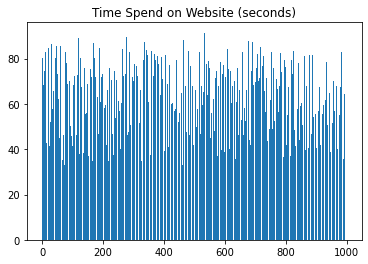

In [7]:
y_numpy = y.to_numpy()

length = np.arange(len(timespentonsite))
plt.bar(length, timespentonsite )
plt.title("Time Spend on Website (seconds)")
plt.show()

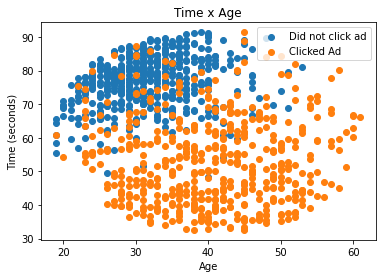

In [8]:
fig, ax = plt.subplots()
scatter_x = ages
scatter_y = timespentonsite
legends={0:"Did not click ad",1:"Clicked Ad"}
for g in np.unique(y_numpy): #pretty much converts y to set, presumably [0,1]
    i = np.where(y_numpy == g) #Picks indexes from y where value == g (0 or 1) ^
    ax.scatter(scatter_x[i], scatter_y[i], label=legends[g])
ax.legend()
plt.xlabel("Age")
plt.ylabel("Time (seconds)")
plt.title("Time x Age")
plt.show()

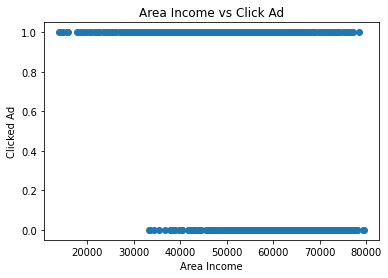

In [9]:
plt.scatter(areaIncome, y_numpy)
plt.title("Area Income vs Click Ad");
plt.xlabel("Area Income")
plt.ylabel("Clicked Ad")
plt.show()

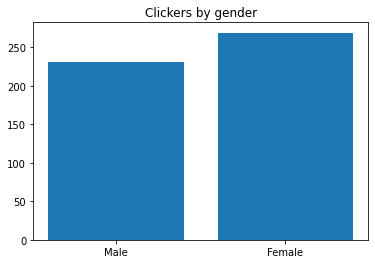

In [10]:
plt.bar(["Male", "Female"], [len(maleclickers[0]), len(femaleclickers[0])])
plt.title("Clickers by gender")
plt.show()

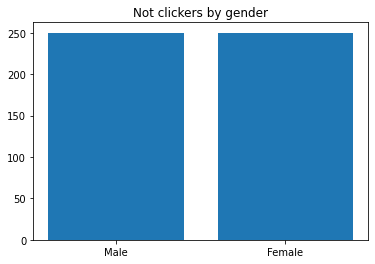

In [12]:
plt.bar(["Male", "Female"], [len(malenotclickers[0]), len(femalenotclickers[0])])
plt.title("Not clickers by gender")
plt.show()


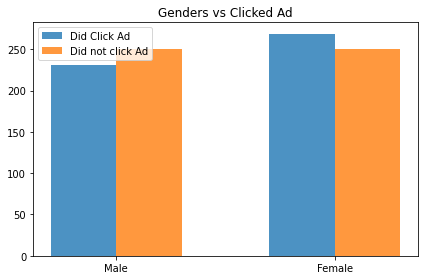

In [13]:
fg,ax = plt.subplots()
indexes = np.arange(2)
barwidth = 0.3
opacity= 0.8
clickersbars = plt.bar(indexes,
                           [len(maleclickers[0]), len(femaleclickers[0])], 
                           alpha=opacity, 
                           width=barwidth, 
                           label="Did Click Ad")
notclickersbars = plt.bar(indexes+barwidth,
                           [len(malenotclickers[0]), len(femalenotclickers[0])], 
                           alpha=opacity, 
                           width=barwidth, 
                           label="Did not click Ad")
plt.title("Genders vs Clicked Ad")
plt.legend()
plt.xticks(indexes+barwidth/2, ["Male", "Female"])
plt.tight_layout()
plt.show()

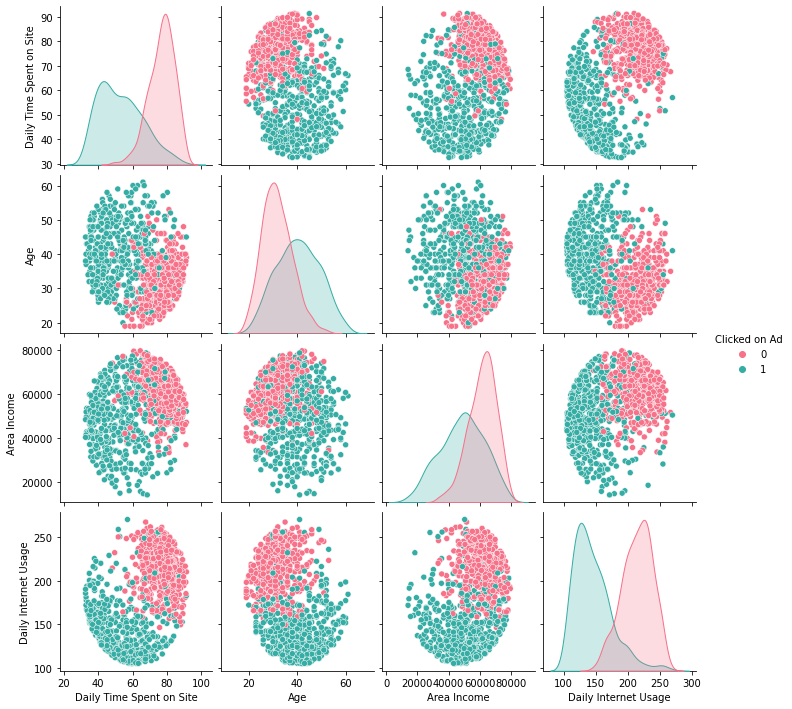

In [14]:
sns.pairplot(data, hue = 'Clicked on Ad', vars = 
             ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'], 
             palette = 'husl')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
from statsmodels.regression.linear_model import OLS

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
X=X.drop(["Ad Topic Line", "Timestamp"], axis=1) #i'll leave this for later...


column_transformer = ColumnTransformer([("city_trans", OneHotEncoder(), ["City"]),
                                        ("country_transformer", OneHotEncoder(), ["Country"])], remainder="passthrough")

In [17]:
encoded_cities = pd.get_dummies(X["City"], drop_first=True, dtype="int")
encoded_countries = pd.get_dummies(X["Country"], drop_first=True, dtype="int")
X=X.drop(["Country", "City"], axis=1)
X=pd.concat([X, encoded_cities, encoded_countries], axis=1)

In [18]:
scaler = StandardScaler().fit(X)
X=scaler.transform(X)
ols = OLS(y, X).fit()
print(ols.summary())


                                 OLS Regression Results                                
Dep. Variable:          Clicked on Ad   R-squared (uncentered):                  -0.207
Model:                            OLS   Adj. R-squared (uncentered):          -1206.164
Method:                 Least Squares   F-statistic:                         -0.0001718
Date:                Mon, 29 Nov 2021   Prob (F-statistic):                        1.00
Time:                        08:36:19   Log-Likelihood:                         -1166.5
No. Observations:                1000   AIC:                                      4331.
Df Residuals:                       1   BIC:                                      9234.
Df Model:                         999                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
X= X[:,0:4]

In [22]:
# X_np=X.to_numpy()
# y_np=y.to_numpy()
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
  #X_sklearnencoding = column_transformer.fit_transform(X).toarray()
  
classifier = SVC(kernel="linear", gamma="auto").fit(X_train, y_train)
y_pred=classifier.predict(X_test)
global cm
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       143
           1       0.98      0.94      0.96       157

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

